# Climate Change

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.
* Data: https://data.worldbank.org/indicator/SP.DYN.LE00.IN


In [2]:
# Read Life Expectancy data from csv file 
lf_df = pd.read_csv("data_sets/Lifeexpectancy.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    lf_df=lf_df.drop(columns=[f"{x}"])
lf_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.429,74.576,74.725,74.872,75.017,75.158,75.299,75.441,75.583,75.725
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,58.826,59.375,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,51.143,52.177,53.243,54.311,55.350,56.330,57.236,58.054,58.776,59.398
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission_percapita.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])

# Preview CO2 emission dataframe
co2_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [4]:
# Merge life expectancy and CO2 dataframes with the key "Country Name"
co2_lf_df=lf_df.merge(co2_df,how="inner",on="Country Name", suffixes=('_lf', '_co2'))

In [5]:
# Preview data
co2_lf_df.head()

,Country Name,Country Code_lf,Indicator Name_lf,Indicator Code_lf,1960_lf,1961_lf,1962_lf,1963_lf,1964_lf,1965_lf,...,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786


In [6]:
# Clean NAN value from merged dataframe 
co2_lf_df.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
co2_lf_df.drop_duplicates(subset=['Country Name'],inplace=True)



In [7]:
# Transfer "Country Name" column to a list of country
country=co2_lf_df["Country Name"].tolist()
#print(country)

In [8]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data
co2_dict={}
lf_dict={}

In [9]:
# Loop every country in the country list
for x in country:
    # Add the key (coutry) to the dictionary
    co2_dict[x]=[]
    lf_dict[x]=[]
    # Loop every year from 1960 to 2015
    for y in range(1960,2016):
        # Add the value to the correponding country.
        co2_dict[x].append(co2_lf_df[f"{y}_co2"][co2_lf_df["Country Name"]==x].values[0])
        lf_dict[x].append(co2_lf_df[f"{y}_lf"][co2_lf_df["Country Name"]==x].values[0])

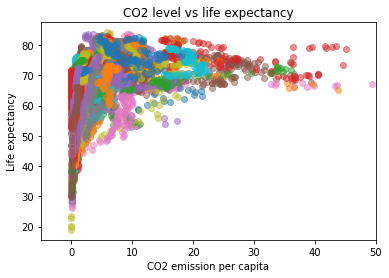

In [49]:
# Loop every coutnry in the country list
co2=[]
lf=[]
for x in country:
    for y in co2_dict[x]:
        co2.append(y)
    for y in lf_dict[x]:
        lf.append(y)
    # Plot the CO2/Life expectancy data of each country
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')


# Set up the figure
plt.xlim(-5,50)
plt.xlabel("CO2 emission per capita")
plt.ylabel("Life expectancy")
plt.title("CO2 level vs life expectancy")
plt.show()

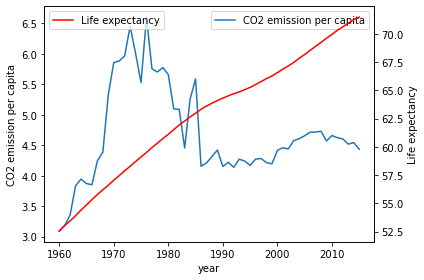

In [11]:
co2_lf_sum=co2_lf_df.describe()
co2_mean=[]
lf_mean=[]
for y in range(1960,2016):
    co2_mean.append(co2_lf_sum.iloc[1][f"{y}_co2"])
    lf_mean.append(co2_lf_sum.iloc[1][f"{y}_lf"])

#plt.plot(co2_mean, lf_mean, alpha=0.5)

year=[x for x in range(1960,2016)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
ax1.plot(year,co2_mean,label="CO2 emission per capita")
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
ax2.plot(year, lf_mean,color="r",label="Life expectancy")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

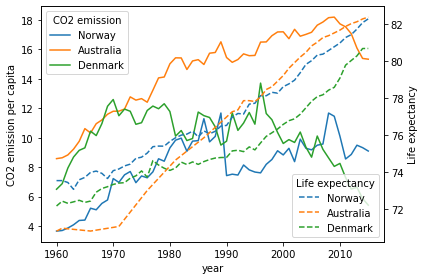

In [24]:
year=[x for x in range(1960,2016)]
Developed_Country=["Norway","Australia","Denmark"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
for x in Developed_Country:
    ax1.plot(year,co2_dict[x])
ax1.tick_params(axis='y')
ax1.legend(Developed_Country,title='CO2 emission',loc='upper left')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developed_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed')
ax2.tick_params(axis='y')
ax2.legend(Developed_Country, title='Life expectancy',loc="lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

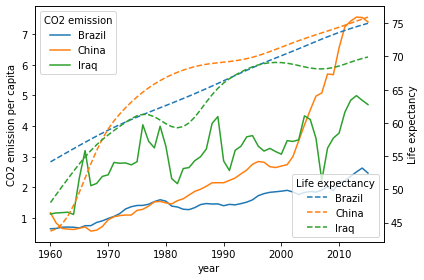

In [25]:
Developing_Country=["Brazil","China","Iraq"]
fig, ax1 = plt.subplots()

ax1.set_xlabel("year")
ax1.set_ylabel("CO2 emission per capita")
for x in Developing_Country:
    ax1.plot(year,co2_dict[x])
    
#ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(Developing_Country,title='CO2 emission',loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Life expectancy')  # we already handled the x-label with ax1
for x in Developing_Country:
    ax2.plot(year, lf_dict[x],linestyle='dashed',)
ax2.tick_params(axis='y')
ax2.legend(Developing_Country, title='Life expectancy',loc="lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()